# StockMarket_TimeSeries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
stock_data = pd.read_excel("C:/Users/Admin/Documents/Stock Market/Dataset/Analysis/StockMarket_Data.xlsm") #index_col=0
#stock_data = pd.read_csv("StockMarket_Data.csv", header = 0, parse_dates = [0], names = ['Date', 'MCBG_Closing_Price'], index_col = 0)

In [3]:
stock_data.dtypes

Date                 datetime64[ns]
Date_Sort                     int64
CIM_Closing_Price           float64
CIM_Volume_Traded           float64
IBL_Closing_Price           float64
                          ...      
USD_BUYING_DD               float64
USD_BUYING_NOTES            float64
USD_SELLING_TT              float64
USD_SELLING_DD              float64
USD_SELLING_NOTES           float64
Length: 134, dtype: object

In [4]:
start_date = "2010-01-01"
end_date = "2018-12-31"

after_start_date = stock_data["Date"] >= start_date
before_end_date = stock_data["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_stock_data = stock_data.loc[between_two_dates]

In [5]:
filtered_stock_data.reset_index(inplace=True)
filtered_stock_data['Date'] = pd.to_datetime(filtered_stock_data['Date'])
filtered_stock_data = filtered_stock_data.set_index('Date')

<ipython-input-5-95891a543c20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stock_data['Date'] = pd.to_datetime(filtered_stock_data['Date'])


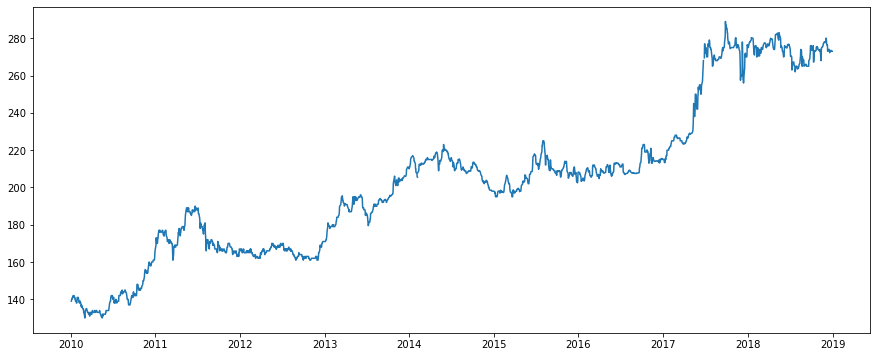

In [6]:
# Let us see the original data spread
#import datetime as dt
#import matplotlib.dates as mdates

#x = [dt.datetime.strptime(Date_Sort,'%Y/%m/%d').date() for Date_Sort in stock_data]
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
#plt.plot(x, stock_data.MCBG_Closing_Price)
#plt.gcf().autofmt_xdate()

plt.plot(filtered_stock_data.MCBG_Closing_Price)

In [7]:
#stock_data['Date']= pd.to_datetime(stock_data['Date'])

In [8]:
df = pd.DataFrame(filtered_stock_data,columns=['MCBG_Closing_Price'])

In [9]:
df.shape

(2337, 1)

In [10]:
df.isna().sum()

MCBG_Closing_Price    98
dtype: int64

In [11]:
df = df.dropna(axis=0, subset=['MCBG_Closing_Price'])   #drop  blanks

In [12]:
df.isna().sum()

MCBG_Closing_Price    0
dtype: int64

In [13]:
df.shape

(2239, 1)

In [14]:
df.dtypes

MCBG_Closing_Price    float64
dtype: object

In [15]:
df.head()

,MCBG_Closing_Price
Date,
2010-01-04,139.0
2010-01-05,140.0
2010-01-06,140.0
2010-01-07,140.0
2010-01-08,141.0


In [16]:
import statsmodels.api as sm
#df.reset_index(inplace=True)
#df['Date'] = pd.to_datetime(df['Date'])
#df = df.set_index('Date')
s=sm.tsa.seasonal_decompose(df['MCBG_Closing_Price'], model = "multiplicative")

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [17]:
decomposition = seasonal_decompose(df.MCBG_Closing_Price, model = "multiplicative")
decomposition.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None